In [1]:
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#importing csv
import pandas as pd
metadata = pd.read_csv("C:\\Users\\LENOVO\\Desktop\\SE\\Project\\train_dataset\\train_data1.csv",encoding='unicode_escape')
metadata.head(5)

,Unnamed: 0,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,...,author,primary_label,longitude,length,time,recordist,license,resampled_sampling_rate,resampled_filename,resampled_channels
0,0,3.5,no,aldfly,1 (mono),5/25/2013,Not specified,25,XC134874.mp3,Not specified,...,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0,32000,XC134874.wav,1 (mono)
1,1,4.0,no,aldfly,2 (stereo),5/27/2013,both,36,XC135454.mp3,both,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),8:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,32000,XC135454.wav,1 (mono)
2,2,4.0,no,aldfly,2 (stereo),5/27/2013,both,39,XC135455.mp3,both,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),8:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,32000,XC135455.wav,1 (mono)
3,3,3.5,no,aldfly,2 (stereo),5/27/2013,both,33,XC135456.mp3,both,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),8:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,32000,XC135456.wav,1 (mono)
4,4,4.0,no,aldfly,2 (stereo),5/27/2013,both,36,XC135457.mp3,level,...,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),8:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...,32000,XC135457.wav,1 (mono)


In [6]:
print(metadata['ebird_code'].unique(),len(metadata['ebird_code'].unique()))
print(metadata.shape)

['aldfly' 'amepip' 'annhum' 'banswa' 'bkbwar' 'bkpwar' 'blujay' 'brdowl'
 'brnthr' 'buggna' 'bushti'] 11
(1100, 39)


['aldfly' 'amepip' 'annhum' 'banswa' 'bkbwar' 'bkpwar' 'blujay' 'brdowl'
 'brnthr' 'buggna' 'bushti']


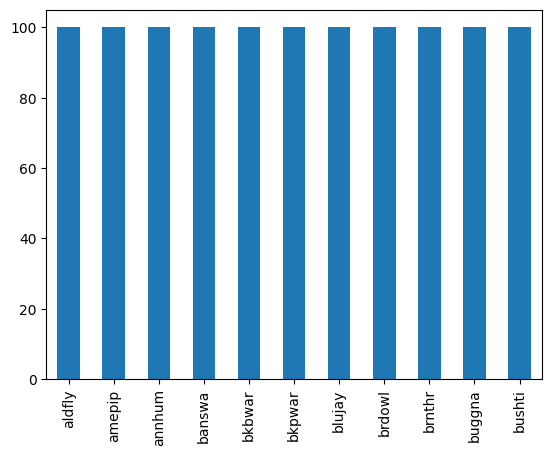

(1100, 39)

In [7]:
metadata['ebird_code'].dropna(inplace=True,axis=0)
print(metadata['ebird_code'].unique())
metadata['ebird_code'].value_counts().plot(kind='bar')
plt.show()
metadata.shape

In [10]:
from scipy import signal

def features_extractor(file_name):
    #load the file (audio)
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_best',duration=12)
    #TRIMMING THE LEADING AND TRAILING SILENCE
    #audio, _ = librosa.effects.trim(audio)
    #we extract mfcc
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #in order to find out scaled feature we do mean of transpose of value
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [11]:
file_name = os.path.abspath("C:\\Users\\LENOVO\\Desktop\\SE\\Project\\train_dataset\\bulori")+"\\XC177260.wav"
data=features_extractor(file_name)
data.shape

(40,)

In [12]:
y, sr = librosa.load("C:\\Users\\LENOVO\\Desktop\\SE\\Project\\train_dataset\\aldfly\\XC135459.wav")
audio_file, _ = librosa.effects.trim(y)
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))


Audio File: [-2.9613268e-05 -1.6397324e-05 -6.1463498e-07 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] 

Audio File shape: (171649,)


In [13]:
#Now we ned to extract the featured from all the audio files so we use tqdm
import numpy as np
from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath("C:\\Users\\LENOVO\\Desktop\\SE\\Project\\train_dataset"),str(row["ebird_code"])+'/',str(row["resampled_filename"]))
    final_class_labels=row["ebird_code"]
    file_names_col=row["resampled_filename"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels,row["resampled_filename"]])

1100it [08:33,  2.14it/s]


In [14]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class','resampled_filename'])
extracted_features_df.head()

,feature,class,resampled_filename
0,"[-410.52246, -51.1085, -82.963715, 18.285072, ...",aldfly,XC134874.wav
1,"[-285.50153, 63.012596, -23.243765, 35.19828, ...",aldfly,XC135454.wav
2,"[-287.56354, 41.952198, -22.547585, 33.98692, ...",aldfly,XC135455.wav
3,"[-299.49948, 41.333195, -25.367855, 31.700344,...",aldfly,XC135456.wav
4,"[-239.44667, 88.98003, -17.131556, 10.371924, ...",aldfly,XC135457.wav


In [15]:
extracted_features_df.to_csv("extracted_features1.csv")

In [16]:
edf=pd.read_csv('C:\\Users\\LENOVO\\Desktop\\SE\\Project\\extracted_features1.csv')
edf['feature'].head()

0    [-410.52246    -51.1085     -82.963715    18.2...
1    [-285.50153     63.012596   -23.243765    35.1...
2    [-287.56354     41.952198   -22.547585    33.9...
3    [-2.9949948e+02  4.1333195e+01 -2.5367855e+01 ...
4    [-2.3944667e+02  8.8980026e+01 -1.7131556e+01 ...
Name: feature, dtype: object

In [17]:
k=[float(i) for i in edf['feature'][0][1:-1].replace("\n","").split()]
print(len(k),k[3],edf.shape[0])

40 18.285072 1100


In [18]:
#print(edf['feature'][0])
#print(edf['feature'][0][1:-1].replace("\n","").split())
dic={}
for i in range(40):
    dic['x'+str(i)]=[]
for j in range(edf.shape[0]):
    k=[float(i) for i in edf['feature'][j][1:-1].replace("\n","").split()]
    for i in range(40):
        dic["x"+str(i)].append(k[i])

print(len(dic),len(dic['x1']))


40 1100


In [19]:
dic['resampled_filename']=edf["resampled_filename"]
dic.keys()

dict_keys(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'resampled_filename'])

In [20]:
feature_df = pd.DataFrame(dic)
feature_df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x31,x32,x33,x34,x35,x36,x37,x38,x39,resampled_filename
0,-410.522460,-51.108500,-82.963715,18.285072,-31.687850,-1.887000,-23.242239,-3.762581,-30.443182,-3.156626,...,1.897100,-3.669259,2.426653,-3.571098,2.435543,-2.400026,3.055719,-1.587042,1.897060,XC134874.wav
1,-285.501530,63.012596,-23.243765,35.198280,-2.951595,8.860498,4.979023,15.641158,-2.850702,8.116041,...,3.647335,-3.664382,2.833610,-3.381110,2.569271,-4.318708,3.128897,-1.024943,2.810604,XC135454.wav
2,-287.563540,41.952198,-22.547585,33.986920,-10.306814,0.676527,5.005632,9.025823,-9.272037,9.837095,...,3.302965,-3.795648,3.039521,-3.951337,3.121337,-2.892660,3.381396,-0.735120,3.349054,XC135455.wav
3,-299.499480,41.333195,-25.367855,31.700344,-12.094341,-4.119553,3.686357,12.663926,-11.679240,6.939735,...,3.428739,-1.534678,2.547035,-1.966991,2.117112,-2.082031,3.558769,-0.435136,4.460746,XC135456.wav
4,-239.446670,88.980026,-17.131556,10.371924,-9.517601,-0.003242,-2.881519,12.857536,-4.537422,10.126432,...,2.241143,-6.224390,1.199616,-5.807491,0.071443,-5.327046,0.782695,-3.082456,1.919013,XC135457.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-443.612430,-56.450111,9.411378,15.083052,-30.454044,34.097885,-30.650162,19.364141,-5.237853,-4.202016,...,3.870354,-5.156364,2.261077,-3.445148,-0.357875,-4.533177,-1.848320,-4.074992,0.553782,XC450764.wav
1096,-388.620420,-44.861355,1.909677,16.839415,-5.136746,13.835913,-11.801148,23.014427,-16.079190,19.080969,...,1.459634,-4.430076,2.892494,-3.346270,1.358566,-6.005957,-1.577763,-5.100880,1.143567,XC451238.wav
1097,-456.536190,-80.628159,-100.790640,0.284317,-39.070206,21.761709,-2.911425,13.435091,-5.635763,32.895626,...,-1.683772,-8.776967,0.965060,-4.113522,2.594467,-2.145124,2.423182,-6.467931,-1.180904,XC459053.wav
1098,-335.490021,42.512959,-0.104320,16.669741,-12.929258,20.232899,-14.216369,18.430613,-8.785849,12.310259,...,4.110211,-4.214955,3.690930,-3.617281,3.299148,-3.080416,2.924606,-2.917231,2.531486,XC475248.wav


In [21]:
final_df=feature_df.merge(edf[["class","resampled_filename"]],on="resampled_filename")
final_df.shape

(1100, 42)

In [ ]:
final_df.drop_duplicates(inplace=True)
final_df.to_csv("extracted_audiofeatures.csv")